In [66]:
import psycopg2
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, words

import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
con = psycopg2.connect(
        database= "senior_project",
        user= "postgres",
        password= "1668",
        host= "localhost",
        port= "5433"
        )

#create cursor obj
cursor_obj = con.cursor()

In [44]:
cursor_obj.execute("select article_content from articles where source = 'CNN' and published_date >= '2016-01-01' and published_date <= '2016-12-31';")
result_2016_cnn = cursor_obj.fetchall()
cursor_obj.execute("select article_content from articles where source = 'FOX' and published_date >= '2016-01-01' and published_date <= '2016-12-31';")
result_2016_fox = cursor_obj.fetchall()

In [45]:
cursor_obj.execute("select article_content from articles where source = 'CNN' and published_date >= '2020-01-01' and published_date <= '2020-12-31';")
result_2020_cnn = cursor_obj.fetchall()
cursor_obj.execute("select article_content from articles where source = 'FOX' and published_date >= '2020-01-01' and published_date <= '2020-12-31';")
result_2020_fox = cursor_obj.fetchall()

In [47]:
result_2016_cnn_text = ''
for i in range(len(result_2016_cnn)):
    result_2016_cnn_text += result_2016_cnn[i][0]
    
result_2020_cnn_text = ""
for i in range(len(result_2020_cnn)):
    result_2020_cnn_text += result_2020_cnn[i][0]

In [51]:
result_2016_fox_text = ''
for i in range(len(result_2016_fox)):
    result_2016_fox_text += result_2016_fox[i][0]
    
result_2020_fox_text = ''
for i in range(len(result_2020_fox)):
    result_2020_fox_text += result_2020_fox[i][0]
tokens_2020 = tokenizer(result_2020_text)

In [40]:
def tokenizer(text):
    #Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [word.lower() for word in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens
tokens_2016 = tokenizer(result_2016_text)

In [52]:
tokens_2016_cnn = tokenizer(result_2016_cnn_text)
tokens_2016_fox = tokenizer(result_2016_fox_text)
tokens_2020_cnn = tokenizer(result_2020_cnn_text)
tokens_2020_fox = tokenizer(result_2020_fox_text)

In [55]:
word_count_2016_cnn = Counter(tokens_2016_cnn)
word_count_2016_fox =Counter(tokens_2016_fox)
word_count_2020_cnn =Counter(tokens_2020_cnn)
word_count_2020_fox =Counter(tokens_2020_fox)

In [89]:
biases = ["immigration", "white", "undocumented", "foreign", "wall", "border" ]
info_cnn = []
info_fox = []

for elem in biases:
    info_cnn.append({"Source": "CNN", "Year": 2016, "Word": elem, "Count": word_count_2016_cnn[elem]})
    info_cnn.append({"Source": "CNN", "Year": 2020, "Word": elem, "Count": word_count_2020_cnn[elem]})
    info_fox.append({"Source": "FOX", "Year": 2016, "Word": elem, "Count": word_count_2016_fox[elem]})
    info_fox.append({"Source": "FOX", "Year": 2020, "Word": elem, "Count": word_count_2020_fox[elem]})
    
df_cnn = pd.DataFrame.from_dict(info_cnn)
df_fox = pd.DataFrame.from_dict(info_fox)

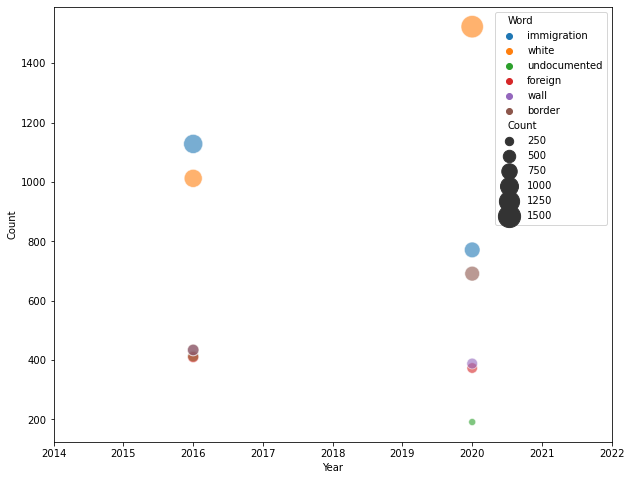

In [94]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_cnn, x="Year", y = "Count", hue = "Word", size = "Count", sizes = (50, 500), alpha = 0.6)
plt.xlim([2014, 2022])
plt.show()

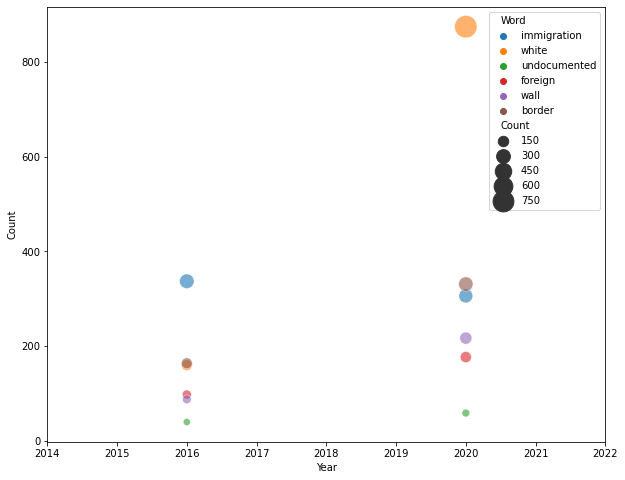

In [93]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_fox, x="Year", y = "Count", hue = "Word", size = "Count", sizes = (50, 500), alpha = 0.6)
plt.xlim([2014, 2022])
plt.show()